In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.misc.pilutil import imread as _imread
import scipy

In [2]:
os.chdir('/Users/manishjain/Documents/Machine Learning/Kaagle competitions/Dog breed classification/Train')

In [3]:
image_size = 224  # Pixel width and height.

def load_image():
  """Load the data for a single letter label."""
  image_files = os.listdir()
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),dtype=np.float32)
 # print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(image)
    try:
      image_data = _imread(image_file,flatten=True,mode=None).astype(float)
      if image_data.shape != (image_size, image_size):
        my_image = scipy.misc.imresize(image_data, size=(image_size,image_size))
        #raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = my_image
      num_images = num_images + 1
       
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  #dataset = dataset[0:num_images, :, :]
  #if num_images < min_num_images:
    #raise Exception('Many fewer images than expected: %d < %d' %
     #               (num_images, min_num_images))
    
  #print('Full dataset tensor:', dataset.shape)
  #print('Mean:', np.mean(dataset))
  #print('Standard deviation:', np.std(dataset))
  return dataset

In [4]:
x_dataset=load_image()

In [5]:
print(x_dataset.shape)

(10222, 224, 224)


In [6]:
def reformat(dataset, ):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  dataset = dataset/255
  return dataset

In [7]:
X_Train= reformat(dataset=x_dataset)

In [8]:
Y_Train= pd.read_csv("/Users/manishjain/Documents/Machine Learning/Kaagle competitions/Dog breed classification/labels.csv")

In [9]:
print(X_Train[6])

[ 0.25882354  0.03137255  0.02352941 ...,  0.04705882  0.04705882
  0.04705882]


In [130]:
#X_Train= x_dataset

In [10]:
print('X_Train', X_Train.shape)
print('Y_Train', Y_Train.shape)

X_Train (10222, 50176)
Y_Train (10222, 2)


In [11]:
del Y_Train["id"]

In [12]:
print('X_train', X_Train.shape)
print('Y_train', Y_Train.shape)


X_train (10222, 50176)
Y_train (10222, 1)


In [13]:
Y_Train = np.squeeze(np.asarray(Y_Train))

In [14]:
print('X_train', X_Train.shape)
print('Y_train', Y_Train.shape)


X_train (10222, 50176)
Y_train (10222,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import optimizers
import numpy

Using TensorFlow backend.


In [16]:
N_class = len(numpy.unique(Y_Train))

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# transform to integer
Y_int = LabelEncoder().fit_transform(Y_Train).reshape(-1,1)
# transform to binary
Y_bin = OneHotEncoder().fit_transform(Y_int).toarray()

In [18]:
print('X_train', X_Train.shape)
print('Y_train', Y_Train.shape)
print('Y_bin', Y_bin.shape)

X_train (10222, 50176)
Y_train (10222,)
Y_bin (10222, 120)


In [19]:
print(Y_int[1])

[37]


In [106]:
model = Sequential()
model.add(Dense(9000, input_dim=10000, kernel_initializer='he_uniform',activation='relu',use_bias=True,bias_initializer='zeros'))
model.add(Dense(8000, kernel_initializer='he_uniform', activation='relu',use_bias=True,bias_initializer='zeros'))
model.add(Dense(6000, kernel_initializer='he_uniform', activation='relu',use_bias=True,bias_initializer='zeros'))
model.add(Dense(2000, kernel_initializer='he_uniform', activation='relu',use_bias=True,bias_initializer='zeros'))
model.add(Dense(1000, kernel_initializer='he_uniform', activation='relu',use_bias=True,bias_initializer='zeros'))
model.add(Dense(N_class, kernel_initializer='he_uniform',use_bias=True,bias_initializer='zeros'))

In [107]:
opti = optimizers.Adam(lr=0.001, beta_1=0.95, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['categorical_accuracy'])

In [108]:
model.fit(X_Train, Y_bin, epochs=10,batch_size=512,validation_split=0.1,verbose=1,shuffle=True)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 386s - loss: 7.8922 - categorical_accuracy: 0.0112 - val_loss: 8.9291 - val_categorical_accuracy: 0.0088
Epoch 2/10
9199/9199 [==============================] - 376s - loss: 7.8075 - categorical_accuracy: 0.0115 - val_loss: 7.4809 - val_categorical_accuracy: 0.0088
Epoch 3/10
9199/9199 [==============================] - 362s - loss: 7.2791 - categorical_accuracy: 0.0117 - val_loss: 7.3519 - val_categorical_accuracy: 0.0078
Epoch 4/10
9199/9199 [==============================] - 362s - loss: 7.0649 - categorical_accuracy: 0.0110 - val_loss: 6.9163 - val_categorical_accuracy: 0.0078
Epoch 5/10
9199/9199 [==============================] - 342s - loss: 10.2641 - categorical_accuracy: 0.0110 - val_loss: 10.8923 - val_categorical_accuracy: 0.0078
Epoch 6/10
9199/9199 [==============================] - 296s - loss: 10.1252 - categorical_accuracy: 0.0104 - val_loss: 9.4399 - val_categorical_

In [23]:
scores = model.evaluate(X_Train, Y_bin)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10222/10222 [==============================] - 58320s  
acc: 0.78%


In [110]:
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

In [31]:
#Non flatten images
image_size = 224  # Pixel width and height.

def load_image_RGB():
  """Load the data for a single letter label."""
  image_files = os.listdir()
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size,3),dtype=np.float32)
 # print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(image)
    try:
      image_data = _imread(image_file,flatten=False,mode=None).astype(float)
      if image_data.shape != (image_size, image_size):
        my_image = scipy.misc.imresize(image_data, size=(image_size,image_size))
        #raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :,:] = my_image
      num_images = num_images + 1
       
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  #dataset = dataset[0:num_images, :, :]
  #if num_images < min_num_images:
    #raise Exception('Many fewer images than expected: %d < %d' %
     #               (num_images, min_num_images))
    
  #print('Full dataset tensor:', dataset.shape)
  #print('Mean:', np.mean(dataset))
  #print('Standard deviation:', np.std(dataset))
  return dataset
x_RGB=load_image_RGB()
x_RGB = x_RGB/255
print('x_RGB',x_RGB.shape)




x_RGB (10222, 224, 224, 3)


In [27]:
x_RGB = x_RGB/255
print(x_RGB[0])

[[[ 0.60392159  0.40784314  0.23137255]
  [ 0.74509805  0.59215689  0.38431373]
  [ 0.64313728  0.47450981  0.24313726]
  ..., 
  [ 0.86274511  0.75294119  0.33333334]
  [ 0.85490197  0.72941178  0.39607844]
  [ 0.80000001  0.67843139  0.31764707]]

 [[ 0.54901963  0.39215687  0.24313726]
  [ 0.67450982  0.52156866  0.36078432]
  [ 0.58823532  0.41568628  0.26274511]
  ..., 
  [ 0.81176472  0.63921571  0.24705882]
  [ 0.7764706   0.6156863   0.31764707]
  [ 0.84313726  0.69803923  0.3137255 ]]

 [[ 0.69411767  0.48627451  0.23529412]
  [ 0.65882355  0.43921569  0.2       ]
  [ 0.63529414  0.41960785  0.23529412]
  ..., 
  [ 0.78823531  0.54901963  0.16862746]
  [ 0.81568629  0.64313728  0.32156864]
  [ 0.80000001  0.64313728  0.3137255 ]]

 ..., 
 [[ 0.74509805  0.47843137  0.30588236]
  [ 0.73725492  0.50588238  0.29411766]
  [ 0.627451    0.41960785  0.25098041]
  ..., 
  [ 0.68627453  0.41960785  0.29803923]
  [ 0.57254905  0.29411766  0.19607843]
  [ 0.62352943  0.35294119  0.23921

In [116]:
 #Create the base pre-trained model
# Can't download weights in the kernel
base_model = VGG19( weights = None, include_top=False, input_shape=(image_size, image_size,3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(N_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [124]:
model.fit(x_RGB,Y_bin, epochs=5, validation_split=0.3, verbose=1, batch_size=512)


Train on 7155 samples, validate on 3067 samples
Epoch 1/5
7155/7155 [==============================] - 2161s - loss: 4.7769 - acc: 0.0131 - val_loss: 4.7840 - val_acc: 0.0111
Epoch 2/5
7155/7155 [==============================] - 2112s - loss: 4.7766 - acc: 0.0129 - val_loss: 4.7840 - val_acc: 0.0111
Epoch 3/5
2048/7155 [=======>......................] - ETA: 1055s - loss: 4.7768 - acc: 0.0098

KeyboardInterrupt: 

In [127]:
trn_features = model.predict(X_Train, batch_size=1)

ValueError: Error when checking : expected input_2 to have 4 dimensions, but got array with shape (10222, 10000)

In [28]:
import h5py

In [29]:
from keras.applications.vgg16 import VGG16
vgg = VGG16()


In [32]:
trn_features = vgg.predict(x_RGB, batch_size=1)

In [33]:
import bcolz

In [34]:
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [37]:
save_array('trn_features.bc', trn_features)

In [38]:
trn_features.shape

(10222, 1000)

In [66]:
from keras import regularizers

In [101]:
from keras.layers import Dense, Dropout, Flatten

In [178]:
lm = Sequential()
lm.add(Dense(900, input_shape=(1000,), kernel_initializer='he_normal',activation='relu'))
lm.add(Dense(800, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.5))
lm.add(Dense(700, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.4))
lm.add(Dense(600, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.5))
lm.add(Dense(500, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.5))
lm.add(Dense(400, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.5))
lm.add(Dense(300, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.4))
lm.add(Dense(200, kernel_initializer='he_normal', activation='relu'))
lm.add(Dropout(0.2))
lm.add(Dense(N_class, kernel_initializer='he_normal', activation='softmax'))




In [179]:
opti = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
lm.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['accuracy'])


Train on 9199 samples, validate on 1023 samples
Epoch 1/200
7s - loss: 4.7876 - acc: 0.0078 - val_loss: 4.7861 - val_acc: 0.0078
Epoch 2/200
5s - loss: 4.7828 - acc: 0.0099 - val_loss: 4.7833 - val_acc: 0.0117
Epoch 3/200
5s - loss: 4.7785 - acc: 0.0126 - val_loss: 4.7822 - val_acc: 0.0088
Epoch 4/200
5s - loss: 4.7723 - acc: 0.0138 - val_loss: 4.7727 - val_acc: 0.0088
Epoch 5/200
5s - loss: 4.7658 - acc: 0.0114 - val_loss: 4.7672 - val_acc: 0.0088
Epoch 6/200
5s - loss: 4.7493 - acc: 0.0148 - val_loss: 4.7266 - val_acc: 0.0156
Epoch 7/200
5s - loss: 4.7120 - acc: 0.0158 - val_loss: 4.6795 - val_acc: 0.0156
Epoch 8/200
5s - loss: 4.6852 - acc: 0.0183 - val_loss: 4.6495 - val_acc: 0.0147
Epoch 9/200
5s - loss: 4.6566 - acc: 0.0175 - val_loss: 4.6176 - val_acc: 0.0137
Epoch 10/200
5s - loss: 4.6093 - acc: 0.0192 - val_loss: 4.6013 - val_acc: 0.0137
Epoch 11/200
5s - loss: 4.5647 - acc: 0.0187 - val_loss: 4.5919 - val_acc: 0.0137
Epoch 12/200
5s - loss: 4.5472 - acc: 0.0202 - val_loss: 4.

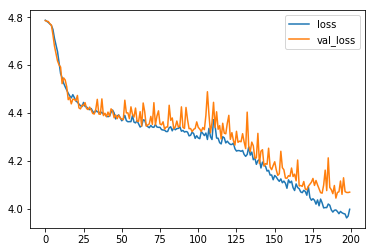

In [180]:
train_history = lm.fit(trn_features, Y_bin, epochs=200,batch_size=512,validation_split=0.1,verbose=2,shuffle=True)
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

Train on 9199 samples, validate on 1023 samples
Epoch 1/50
6s - loss: 4.0051 - acc: 0.0609 - val_loss: 4.0483 - val_acc: 0.0547
Epoch 2/50
6s - loss: 4.0381 - acc: 0.0567 - val_loss: 4.0774 - val_acc: 0.0577
Epoch 3/50
6s - loss: 4.0654 - acc: 0.0612 - val_loss: 4.1198 - val_acc: 0.0528
Epoch 4/50
6s - loss: 4.0346 - acc: 0.0596 - val_loss: 4.0359 - val_acc: 0.0577
Epoch 5/50
6s - loss: 4.0129 - acc: 0.0591 - val_loss: 4.0313 - val_acc: 0.0606
Epoch 6/50
6s - loss: 4.0026 - acc: 0.0597 - val_loss: 4.0452 - val_acc: 0.0557
Epoch 7/50
6s - loss: 4.0021 - acc: 0.0608 - val_loss: 4.0362 - val_acc: 0.0450
Epoch 8/50
6s - loss: 4.0069 - acc: 0.0594 - val_loss: 4.0364 - val_acc: 0.0557
Epoch 9/50
6s - loss: 4.0038 - acc: 0.0615 - val_loss: 4.0456 - val_acc: 0.0587
Epoch 10/50
6s - loss: 3.9921 - acc: 0.0597 - val_loss: 4.0373 - val_acc: 0.0635
Epoch 11/50
6s - loss: 3.9646 - acc: 0.0636 - val_loss: 4.0599 - val_acc: 0.0596
Epoch 12/50
6s - loss: 3.9802 - acc: 0.0625 - val_loss: 4.0226 - val_a

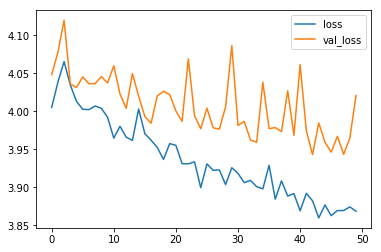

In [181]:
train_history = lm.fit(trn_features, Y_bin, epochs=50,batch_size=256,validation_split=0.1,verbose=2,shuffle=True)
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()